**`Period Vehicle Routing Problem`**

In [ ]:
import numpy as np
NUM_CUSTOMERS = 10
NUM_VEHICLES = 3
DEPOT = 0
CAPACITIES = [20, 15, 10]
MAX_TIME = 8
ALPHA = 1.0
BETA = 2.0
RHO = 0.5
Q = 100
EPSILON = 1e-10
customer_data = {
    1: (4, 9, 11),
    2: (5, 10, 12),
    3: (3, 8, 10),
    4: (2, 9, 11),
    5: (6, 8, 10),
    6: (4, 10, 12),
    7: (7, 9, 11),
    8: (8, 8, 10),
    9: (5, 10, 12),
    10: (3, 9, 11),
}
distances = np.random.randint(1, 20, size=(NUM_CUSTOMERS + 1, NUM_CUSTOMERS + 1)).astype(float)
np.fill_diagonal(distances, 0)
distances += EPSILON
heuristics = 1.0 / (1 + distances)
pheromones = np.ones((NUM_CUSTOMERS + 1, NUM_CUSTOMERS + 1)) / 1000.0
num_ants = 5
ants = [[] for _ in range(num_ants)]
for iteration in range(50):
    for ant in range(num_ants):
        current_node = DEPOT
        visited_nodes = [current_node]
        remaining_capacity = CAPACITIES[ant % NUM_VEHICLES]
        remaining_time = MAX_TIME
        customer_order = list(range(1, NUM_CUSTOMERS + 1))
        np.random.shuffle(customer_order)
        for next_node in customer_order:
            probabilities = (
                (pheromones[current_node] ** ALPHA) *
                (heuristics[current_node] ** BETA)
            )
            unvisited_nodes = [
                node for node in range(1, NUM_CUSTOMERS + 1) if node not in visited_nodes
            ]
            probabilities /= probabilities[unvisited_nodes].sum()
            if unvisited_nodes:
                next_node = np.random.choice(unvisited_nodes, p=probabilities[unvisited_nodes])
                demand, time_start, time_end = customer_data[next_node]
                if remaining_capacity >= demand and time_start <= remaining_time <= time_end:
                    visited_nodes.append(next_node)
                    remaining_capacity -= demand
                    remaining_time -= distances[current_node][next_node]
                    current_node = next_node
        visited_nodes.append(DEPOT)
        ants[ant] = visited_nodes
    for ant in ants:
        total_distance = sum(distances[ant[i]][ant[i + 1]] for i in range(len(ant) - 1))
        for i in range(len(ant) - 1):
            pheromones[ant[i]][ant[i + 1]] = (1 - RHO) * pheromones[ant[i]][ant[i + 1]] + Q / total_distance
for i, ant in enumerate(ants):
    print(f"Ant-{i + 1} = {ant}")
    total_distance = sum(distances[ant[i]][ant[i + 1]] for i in range(len(ant) - 1))
    print(f"Total Distance = {total_distance}")
    print()

Ant-1 = [0, 5, 0]
Total Distance = 21.0000000002

Ant-2 = [0, 8, 0]
Total Distance = 14.0000000002

Ant-3 = [0, 3, 0]
Total Distance = 18.0000000002

Ant-4 = [0, 8, 0]
Total Distance = 14.0000000002

Ant-5 = [0, 8, 0]
Total Distance = 14.0000000002



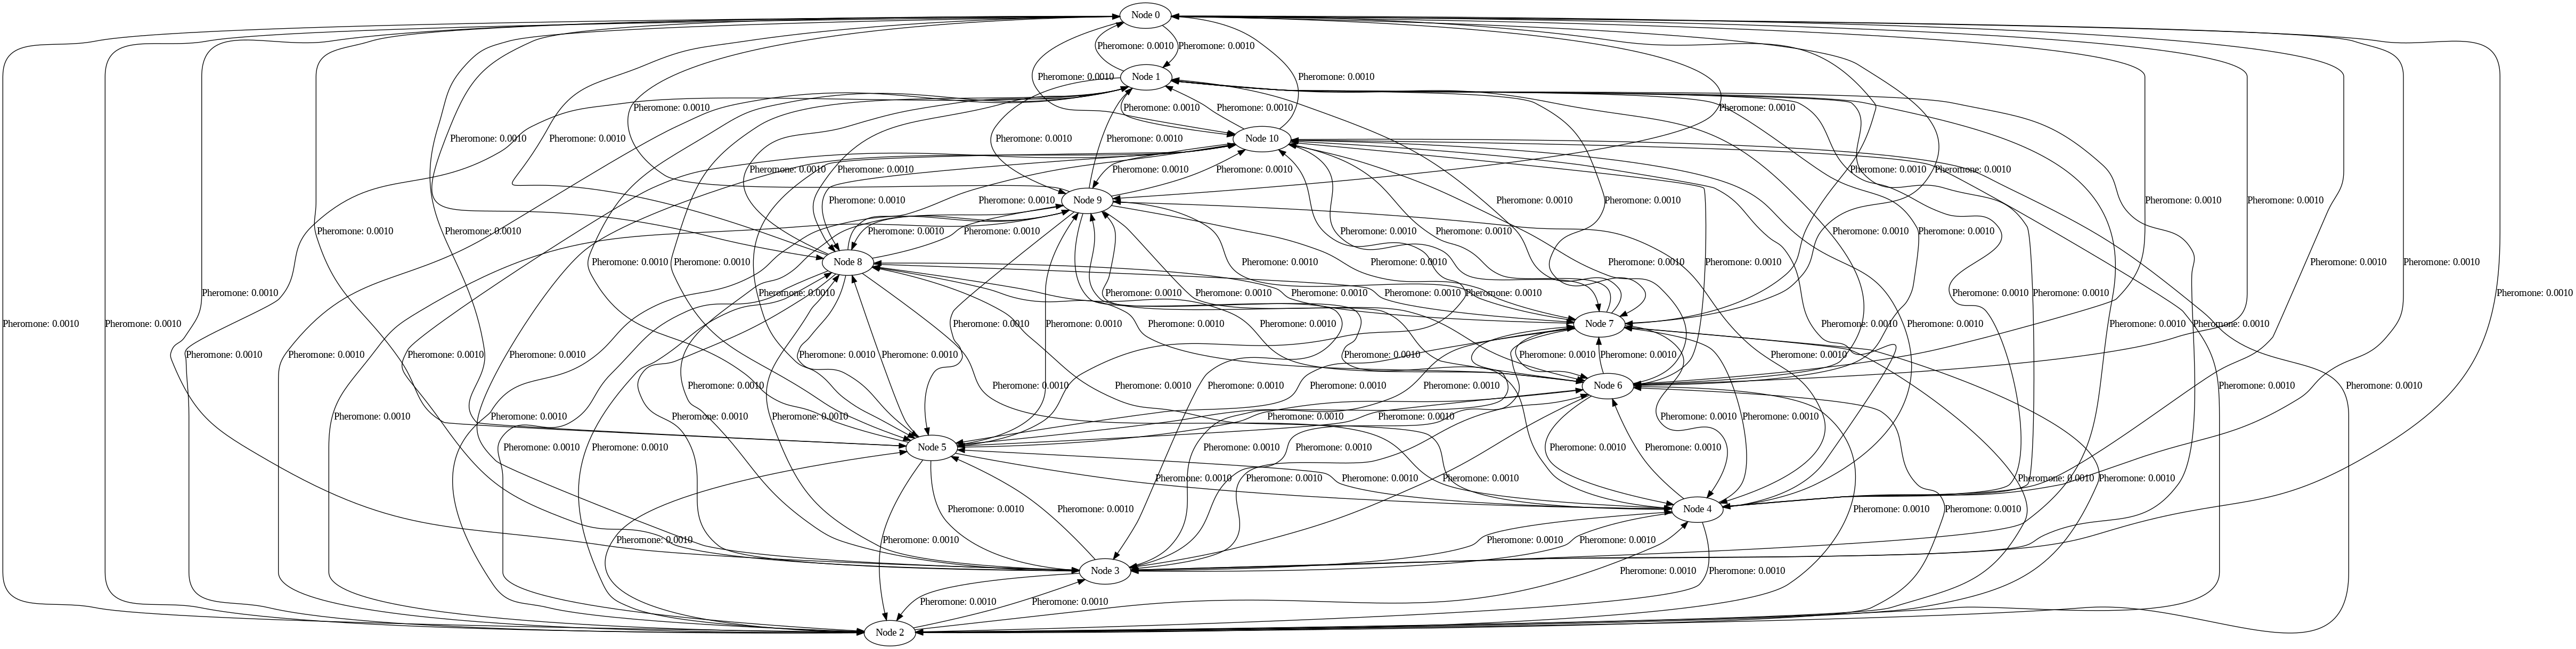

In [ ]:
import numpy as np
import pygraphviz as pgv
from IPython.display import Image
NUM_CUSTOMERS = 10
NUM_VEHICLES = 3
DEPOT = 0
CAPACITIES = [20, 15, 10]
MAX_TIME = 8
ALPHA = 1.0
BETA = 2.0
RHO = 0.5
Q = 100
EPSILON = 1e-10
customer_data = {
    1: (4, 9, 11),
    2: (5, 10, 12),
    3: (3, 8, 10),
    4: (2, 9, 11),
    5: (6, 8, 10),
    6: (4, 10, 12),
    7: (7, 9, 11),
    8: (8, 8, 10),
    9: (5, 10, 12),
    10: (3, 9, 11),
}
distances = np.random.randint(1, 20, size=(NUM_CUSTOMERS + 1, NUM_CUSTOMERS + 1)).astype(float)
np.fill_diagonal(distances, 0)
distances += EPSILON
heuristics = 1.0 / (1 + distances)
pheromones = np.ones((NUM_CUSTOMERS + 1, NUM_CUSTOMERS + 1)) / 1000.0
G = pgv.AGraph(strict=True, directed=True)
for i in range(NUM_CUSTOMERS + 1):
    G.add_node(i, label=f"Node {i}")
for i in range(NUM_CUSTOMERS + 1):
    for j in range(NUM_CUSTOMERS + 1):
        if i != j:
            G.add_edge(i, j, label=f"Pheromone: {pheromones[i][j]:.4f}")
graph_filename = "initial_graph.png"
G.draw(graph_filename, format="png", prog="dot")
Image(graph_filename)
num_ants = 5
ants = [[] for _ in range(num_ants)]
for iteration in range(50):
    for ant in range(num_ants):
        current_node = DEPOT
        visited_nodes = [current_node]
        remaining_capacity = CAPACITIES[ant % NUM_VEHICLES]
        remaining_time = MAX_TIME
        customer_order = list(range(1, NUM_CUSTOMERS + 1))
        np.random.shuffle(customer_order)
        for next_node in customer_order:
            probabilities = (
                (pheromones[current_node] ** ALPHA) *
                (heuristics[current_node] ** BETA)
            )
            unvisited_nodes = [
                node for node in range(1, NUM_CUSTOMERS + 1) if node not in visited_nodes
            ]
            probabilities /= probabilities[unvisited_nodes].sum()
            if unvisited_nodes:
                next_node = np.random.choice(unvisited_nodes, p=probabilities[unvisited_nodes])
                demand, time_start, time_end = customer_data[next_node]
                if remaining_capacity >= demand and time_start <= remaining_time <= time_end:
                    visited_nodes.append(next_node)
                    remaining_capacity -= demand
                    remaining_time -= distances[current_node][next_node]
                    current_node = next_node
        visited_nodes.append(DEPOT)
        ants[ant] = visited_nodes
    for ant in ants:
        total_distance = sum(distances[ant[i]][ant[i + 1]] for i in range(len(ant) - 1))
        for i in range(len(ant) - 1):
            source_node, target_node = ant[i], ant[i + 1]
            if G.has_edge(source_node, target_node):
                edge = G.get_edge(source_node, target_node)
                edge.attr.update(label=f"Pheromone: {pheromones[source_node][target_node]:.4f}")
    graph_filename = f"iteration_{iteration + 1}_graph.png"
    G.draw(graph_filename, format="png", prog="dot")
Image(graph_filename)

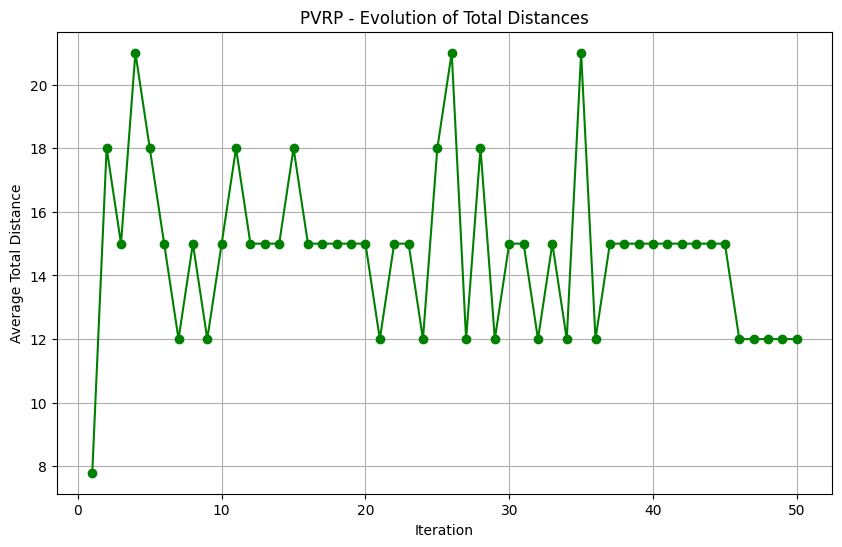

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
NUM_CUSTOMERS = 10
NUM_VEHICLES = 3
DEPOT = 0
CAPACITIES = [20, 15, 10]
MAX_TIME = 8
ALPHA = 1.0
BETA = 2.0
RHO = 0.5
Q = 100
EPSILON = 1e-10
customer_data = {
    1: (4, 9, 11),
    2: (5, 10, 12),
    3: (3, 8, 10),
    4: (2, 9, 11),
    5: (6, 8, 10),
    6: (4, 10, 12),
    7: (7, 9, 11),
    8: (8, 8, 10),
    9: (5, 10, 12),
    10: (3, 9, 11),
}
distances = np.random.randint(1, 20, size=(NUM_CUSTOMERS + 1, NUM_CUSTOMERS + 1)).astype(float)
np.fill_diagonal(distances, 0)
distances += EPSILON
heuristics = 1.0 / (1 + distances)
pheromones = np.ones((NUM_CUSTOMERS + 1, NUM_CUSTOMERS + 1)) / 1000.0
num_ants = 5
ants = [[] for _ in range(num_ants)]
iteration_distances = []
for iteration in range(50):
    total_distances = []
    for ant in range(num_ants):
        current_node = DEPOT
        visited_nodes = [current_node]
        remaining_capacity = CAPACITIES[ant % NUM_VEHICLES]
        remaining_time = MAX_TIME
        customer_order = list(range(1, NUM_CUSTOMERS + 1))
        np.random.shuffle(customer_order)

        for next_node in customer_order:
            probabilities = (
                (pheromones[current_node] ** ALPHA) *
                (heuristics[current_node] ** BETA)
            )
            unvisited_nodes = [
                node for node in range(1, NUM_CUSTOMERS + 1) if node not in visited_nodes
            ]
            probabilities /= probabilities[unvisited_nodes].sum()

            if unvisited_nodes:
                next_node = np.random.choice(unvisited_nodes, p=probabilities[unvisited_nodes])
                demand, time_start, time_end = customer_data[next_node]
                if remaining_capacity >= demand and time_start <= remaining_time <= time_end:
                    visited_nodes.append(next_node)
                    remaining_capacity -= demand
                    remaining_time -= distances[current_node][next_node]
                    current_node = next_node
        visited_nodes.append(DEPOT)
        ants[ant] = visited_nodes
        total_distance = sum(distances[ants[ant][i]][ants[ant][i + 1]] for i in range(len(ants[ant]) - 1))
        total_distances.append(total_distance)
    for ant in ants:
        total_distance = sum(distances[ant[i]][ant[i + 1]] for i in range(len(ant) - 1))
        for i in range(len(ant) - 1):
            pheromones[ant[i]][ant[i + 1]] = (1 - RHO) * pheromones[ant[i]][ant[i + 1]] + Q / total_distance
    iteration_distances.append(np.mean(total_distances))
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), iteration_distances, marker='o', linestyle='-', color='g')
plt.title('PVRP - Evolution of Total Distances')
plt.xlabel('Iteration')
plt.ylabel('Average Total Distance')
plt.grid(True)
plt.show()